## Summarize model performance



In [1]:
import pickle
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datadir = Path('/Users/poldrack/data_unsynced/multitask/encoding_models')


def combine_scores(scoredict):
    """
    combine scores across subjects into a single df
    """
    combined_df = None
    
    for ontology, ontologydata in scoredict.items():
        for sub, subdata in ontologydata.items():
            for score in subdata:
                sub_df = pd.DataFrame(subdata)
                sub_df['subcode'] = sub
                sub_df['ontology'] = ontology
                if combined_df is None:
                    combined_df = sub_df
                else:
                    combined_df = pd.concat((combined_df, sub_df))
    return(combined_df)


In [2]:
# load results file


accuracy_df = {}
r2_scores_df = {}
regionwise_scores = {}
mapwise_scores = {}

mean_accuracy = {}
mean_r2_score = {}

ontologies = ['all', 'cognitive', 'perceptual-motor', 'null']

#ontologies = ['all', 'null']
#ontologies = ['all']

methods = ['ridgecv']

for method in methods:
    if method not in accuracy_df:
        accuracy_df[method] = {}
        mean_accuracy[method] = {}
    if method not in regionwise_scores:
        mapwise_scores[method] = {}
        regionwise_scores[method] = {}

    for ontology in ontologies:
        accuracy_df[method][ontology] = pd.read_csv(datadir / f'accuracy_{ontology}_{method}.csv', index_col=0)
        mean_accuracy[method][ontology] = accuracy_df[method][ontology].groupby('subcode').mean()
        mean_accuracy[method][ontology]['ontology'] = ontology
        
        with open(datadir / f'regionwise_scores_{ontology}_{method}.pkl', 'rb') as f:
            regionwise_scores[method][ontology] = pickle.load(f)
        
        with open(datadir / f'mapwise_scores_{ontology}_{method}.pkl', 'rb') as f:
            mapwise_scores[method][ontology] = pickle.load(f)

regionwise_df = combine_scores(regionwise_scores['ridgecv'])


In [3]:

mapwise_list = []
for k in mapwise_scores['ridgecv']:
    
    mapwise_scores['ridgecv'][k]['ontology'] = k
    mapwise_list.append(mapwise_scores['ridgecv'][k])

    mapwise_df = pd.concat(mapwise_list)


## Summarize leave-two-out accuracy

In [4]:
# get mean accuracy across subjects

mean_accuracy_combined = pd.concat((mean_accuracy['ridgecv']))
mean_accuracy_combined.groupby('ontology').mean()

,value
ontology,
all,0.689861
cognitive,0.400956
null,0.114579
perceptual-motor,0.659482


(0.0, 1.0)

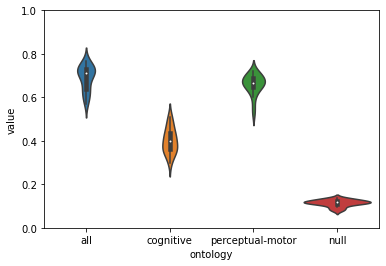

In [5]:

sns.violinplot(x='ontology', y='value', data=mean_accuracy_combined)


plt.ylim(0, 1)


## summarize mapwise r2_score by subject



In [6]:
mapwise_df.groupby('ontology').mean()

,r2_score,rscore
ontology,,
all,0.491146,0.762872
cognitive,0.330554,0.706175
null,0.216457,0.613292
perceptual-motor,0.495142,0.749276


(0.0, 1.0)

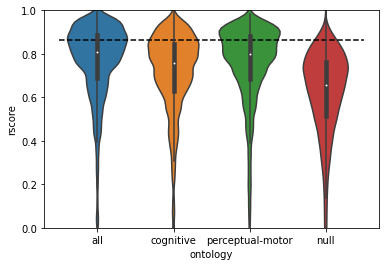

In [7]:
sns.violinplot(x='ontology', y='rscore', data=mapwise_df)

# get 95%ile of null distribution
nulldata = mapwise_df.query('ontology == "null"')['rscore']
plt.hlines(nulldata.quantile(.95), xmin=-0.5, xmax=3.5, color='k', linestyles='dashed')

plt.ylim(0, 1)

## Summarize regionwise correlation by subject

(-1.0, 1.0)

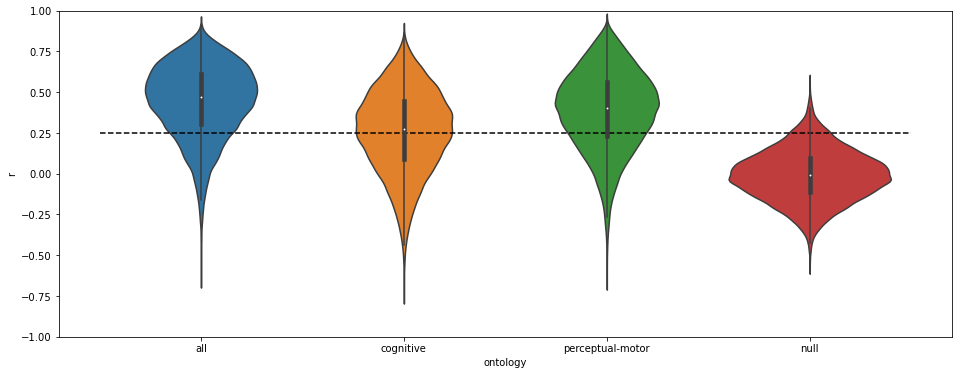

In [8]:
plt.figure(figsize=(16,6))
sns.violinplot(x='ontology',  y='r', data=regionwise_df)

# get 95%ile of null distribution
nulldata = regionwise_df.query('ontology == "null"')['r']
plt.hlines(nulldata.quantile(.95), xmin=-0.5, xmax=3.5, color='k', linestyles='dashed')
plt.ylim(-1, 1)